In [1]:
function check_install(function_name)
    println("sprawdzam!!!!!!!")
    if ((Pkg.installed(function_name))!= nothing)
        @printf("%s juz zainstalowany!!!!!!!!!!!\n",function_name)
  else
    print("bede instalowala!!!!!!!")
    Pkg.add(function_name)      
  end
end

check_install (generic function with 1 method)

In [107]:
using Images, DataFrames, ImageView

print("cokolwiek!!!!!")
potrzebne_pakiety = ["Images", "DataFrames", "ImageView", "Tk", "Colors", "FixedPointNumbers"]
map(check_install,potrzebne_pakiety);


cokolwiek!!!!!sprawdzam!!!!!!!
Images juz zainstalowany!!!!!!!!!!!
sprawdzam!!!!!!!
DataFrames juz zainstalowany!!!!!!!!!!!
sprawdzam!!!!!!!
ImageView juz zainstalowany!!!!!!!!!!!
sprawdzam!!!!!!!
Tk juz zainstalowany!!!!!!!!!!!
sprawdzam!!!!!!!
Colors juz zainstalowany!!!!!!!!!!!
sprawdzam!!!!!!!
FixedPointNumbers juz zainstalowany!!!!!!!!!!!


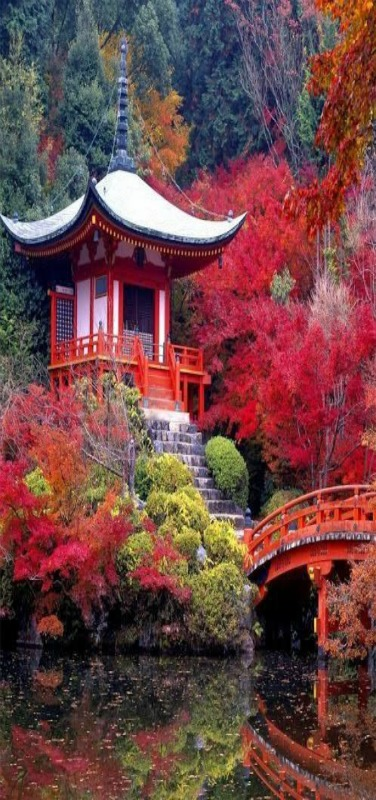

In [3]:
img = load("image.jpg")

In [132]:
# funkcje są pisane w losowej kolejności :)
function custom_canvasgrid(image_array,split::Int64)
    #     wyświetla siatkę małych obrazków
    c = canvasgrid(w=680,h=800,split,split)
    #     w i h trzeba ręcznie ustawiać w zależności od wysokości paska tytułowego w systemie
    ops = Dict(:pixelspacing => [1,1])
    for i in 1:split
        for j in 1:split
            ImageView.view(c[i,j], image_array[i,j]; ops...)
        end
    end
end

function split_image(image,split::Int64)
    #     rozbija duży obraz na [split x split] mniejszych (wymaga kwadratów, chyba)
    image=rotr90(image)
    im_width,im_height= size(image)
    split_width = div(im_width,split)
    split_height = div(im_height,split)

    image_matrix = []
    for j in 1:split
        for i in 1:split

            sqs=image[1+(i-1)*split_width:i*split_width,1+(j-1)*split_height:j*split_height]
            
#             println(1+(i-1)*split_width:i*split_width)
#             println(1+(j-1)*split_height:j*split_height)
#             println( )
            
            push!(image_matrix,sqs)
        end        
    end
    im2 = reshape(image_matrix,split,split)
    return im2
end

function make_square(image, split::Int64)
    #     obcina obrazek do kwadratu, modulo parametru split
    im_width,im_height= size(image)
    min_dim = min(im_width, im_height)
    while min_dim > 0
        if min_dim % split ==0
            print(min_dim)
            return image[1:min_dim,1:min_dim]
        else
            min_dim-=1
        end
    end
end

function random_rotate(image)
    #     obraca o losową wielokrotność kąta prostego
    return rotl90(image,round(Int64,rand()*4))
end

function rand_imlist_rot(imlist)
    #   obraca podmacierze w macierzy ;P
    width,height = size(imlist)
    for i in 1:width
        for j in 1:height
            imlist[i,j]=random_rotate(imlist[i,j])
        end
    end
    return imlist
end

function black_window(image)
    #     po prostu generuje czarny kwadrat
    width,height = size(image)
    black = Colors.RGB{FixedPointNumbers.UFixed8}(0.,0.,0.);
    black_win = fill(black,width,height)
    return black_win
end

function mix_array(X)
    #     zamienia losowo pozycje elementów w macierzy
    w,h = size(X)
    for i in 1:10e5
        idx1=rand(1:w)
        idx2=rand(1:h)
        idx3=rand(1:w)
        idx4=rand(1:h)
        for k = 1:size(X,1)
            for l = 1:size(X,1)
                X[idx1,idx2],X[k,l] = X[k,l],X[idx1,idx2]
            end
        end
    end
    return X
end

function swap_ud(X,iw,ih)
    #     zamienia elementy sąsiadujące w pionie z wybranym elementem macierzy
    w,h = size(X)
    if iw+1<=w && iw-1>=1
        X[iw+1,ih],X[iw-1,ih] = X[iw-1,ih],X[iw+1,ih]
    end
    return X
end

function swap_lr(X,iw,ih)
    #     zamienia elementy sąsiadujące w poziomie z wybranym elementem macierzy
    w,h = size(X)
    if ih+1<=h && ih-1>=1
        X[iw,ih+1],X[iw,ih-1] = X[iw,ih-1],X[iw,ih-1]
    end
    return X
end

swap_lr (generic function with 1 method)

In [112]:
function init(image,bok)
    a1=make_square(img,bok);
    a2=split_image(a1,bok);
    a2=mix_array(a2)
    a2[bok,bok]=black_window(a2)
    
    a3=rand_imlist_rot(a2);
    
    custom_canvasgrid(a3,bok)
    return a2
end

init (generic function with 1 method)

In [128]:
asd = [1 2 3; 4 5 6; 7 8 9]
print(asd)
println( )
print(swap_ud(asd,2,2))

[1 2 3
 4 5 6
 7 8 9]
[1 8 3
 4 5 6
 7 2 9]

In [115]:
init(img,3);

375

In [45]:
# https://github.com/JuliaGraphics/Tk.jl/tree/master/examples
w = Tk.Toplevel("Example")                                    ## A titled top level window
f = Tk.Frame(w, padding = [3,3,2,2], relief="groove")         ## A Frame with some options set
Tk.pack(f, expand = true, fill = "both")                      ## using pack to manage the layout of f
#
b = Tk.Button(f, "Click for a message")                       ## Button constructor has convenience interface
Tk.grid(b, 1, 1)                                              ## use grid to pack in b. 1,1 specifies location
#
callback(path) = Tk.Messagebox(w, title="A message", message="Hello World") ## A callback to open a message
Tk.bind(b, "command", callback)                            ## bind callback to 'command' option
Tk.bind(b, "<Return>", callback)                           ## press return key when button has focus

""